# Analysis of related skills posted on Naukri.com. 

### The purpose of this analysis is to provide an insight on different job skills that are desired by the employer when they post a job with our candidate job skill

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Below code will highlight row number and column names in a different colour in dataframe

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Select a job skill for which related skills needs to be analysed

In [3]:
job_skill = 'python'
job_skill = job_skill.upper()

### Read data from csv file and show first five records

In [4]:
jobs = pd.read_csv('scrapped_job_data.csv')
jobs.head()

,job_id,job_title,company,experience,salary,location,job_age,skills
0,1,Research Software Developer (computer Vision),Resson,2-6 Yrs,Not disclosed,Navi Mumbai,14 DAYS AGO,Object Detection|Algorithm Development|C++|Pat...
1,2,Bangalore - Full Stack Developer (0-2 Yrs)(jav...,Soft Suave Technologies Private Limited,0-2 Yrs,300000 PA.,Bengaluru,3 DAYS AGO,Java|CSS|Software Development|Software Enginee...
2,3,Python Developer,bitmonksoftware,0-1 Yrs,Not disclosed,Bengaluru,3 DAYS AGO,OOPS|Python
3,4,Non-fresher/bca Welcome - Trainee/jr. Develope...,VERTS Services India Private Limited,0-2 Yrs,Not disclosed,Noida,9 DAYS AGO,Go Getter|Communication Skills|Postgresql|MySQ...
4,5,Hiring Python Developers,WELLS FARGO EGS (India) PRIVATE LIMITED,6-10 Yrs,1300000 - 2300000 PA.,Bengaluru| Hyderabad,3 DAYS AGO,Pyspark|Artificial Intelligence|Hadoop|SCALA|B...


### For each job, expand jobs skills originally seperated by '|' to separate rows

In [5]:
jobs_df = jobs[['job_id', 'skills']]
jobs_df = jobs_df.assign(skills = jobs_df['skills'].str.split('|')).explode('skills')
jobs_df.head(40)

,job_id,skills
0,1,Object Detection
0,1,Algorithm Development
0,1,C++
0,1,Pattern Recognition
0,1,Algorithms
0,1,Opencv
0,1,Image Processing
0,1,Computer Vision
1,2,Java
1,2,CSS


### Fetch job_ids of all the posted job that has tagged our candidate skill as one of the required skills

In [6]:
job_ids = jobs_df[jobs_df.skills.str.upper() == job_skill]['job_id']
job_ids.columns = ['job_id']
job_ids.head()

2      3
3      4
5      6
6      7
12    13
Name: job_id, dtype: int64

### Join jobs_df dataframe with job_ids dataframe created in last two steps with 'job_id' as the key column

In [7]:
required_skills = jobs_df.merge(job_ids,on=['job_id'])
required_skills.head(40)

,job_id,skills
0,3,OOPS
1,3,Python
2,4,Go Getter
3,4,Communication Skills
4,4,Postgresql
5,4,MySQL
6,4,Programming
7,4,Fresher
8,4,Python
9,6,Python


### Group final dataset by skill to view how many time different skills have been tagged with our candidate skill. This will provide an insight on different job skills that are desired by the employer when they post a job with our candidate job skill

In [8]:
req_skill_view = required_skills[required_skills['skills'].str.upper() != job_skill].groupby(required_skills['skills'].str.upper()).size()
req_skill_view = req_skill_view.sort_values(ascending=False)
req_skill_view.head(40)

skills
DJANGO                     134
JAVASCRIPT                  58
PYTHON DEVELOPER            50
LINUX                       42
AWS                         41
SQL                         38
FLASK                       36
MACHINE LEARNING            35
JAVA                        34
HTML                        31
MYSQL                       31
CLOUD                       24
CSS                         24
WEB TECHNOLOGIES            22
OOPS                        21
SOFTWARE DEVELOPMENT        20
PROGRAMMING                 19
GIT                         18
C                           18
IT SKILLS                   17
C++                         17
MONGODB                     16
DOCKER                      16
FRONT END                   16
KUBERNETES                  16
WORK FROM HOME              15
ALGORITHMS                  14
POSTGRESQL                  14
BACKEND                     14
AUTOMATION TESTING          13
NUMPY                       13
DATA SCIENCE                13
C

### Plot a barchart showing this relation

Text(0.5, 0, 'PYTHON')

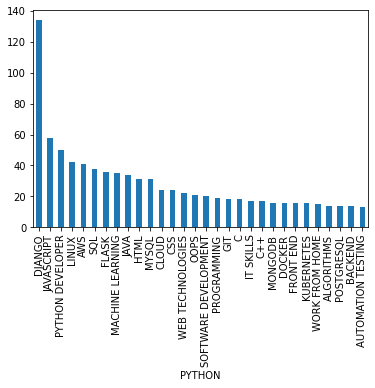

In [9]:
graph = req_skill_view.head(30).plot(kind='bar')
graph.set_xlabel(job_skill)